## New markdown cell

# AlexNet

## Download Tiny ImageNet

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

In [ ]:
!unzip tiny-imagenet-200.zip

## Setup

In [3]:
!pip install tensorflow

     |████████████████████████████████| 49.4 MB 125 kB/s  eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 320.4 MB 16 kB/s s eta 0:00:01  |▎                               | 2.6 MB 3.5 MB/s eta 0:01:32     |██████                          | 60.0 MB 32.5 MB/s eta 0:00:0805               | 95.1 MB 54.8 MB/s eta 0:00:05     |████████████████▊               | 167.4 MB 58.4 MB/s eta 0:00:03     |██████████████████████████▋     | 266.4 MB 57.9 MB/s eta 0:00:01     |█████████████████████████████▉  | 298.4 MB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 33.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 37.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 48 kB/s s eta 0:00:01    |███▌                            | 2.9 MB 39.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.3 MB/s  eta 0:00:01
     |████████████████████

In [67]:
import numpy as np
import os
from shutil import copyfile, rmtree
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Loading Data

In [21]:
IMG_DIR = 'tiny-imagenet-200'
IMG_HEIGHT = IMG_WIDTH = 227
BATCH_SIZE = 128

In [80]:
# Get list of class of words
words_file = open(f'{IMG_DIR}/words.txt')
words = words_file.readlines()
class_words = {word.split('\t')[0]: word.split('\t')[1] for word in words}
class_words

{'n00001740': 'entity\n',
 'n00001930': 'physical entity\n',
 'n00002137': 'abstraction, abstract entity\n',
 'n00002452': 'thing\n',
 'n00002684': 'object, physical object\n',
 'n00003553': 'whole, unit\n',
 'n00003993': 'congener\n',
 'n00004258': 'living thing, animate thing\n',
 'n00004475': 'organism, being\n',
 'n00005787': 'benthos\n',
 'n00005930': 'dwarf\n',
 'n00006024': 'heterotroph\n',
 'n00006150': 'parent\n',
 'n00006269': 'life\n',
 'n00006400': 'biont\n',
 'n00006484': 'cell\n',
 'n00007347': 'causal agent, cause, causal agency\n',
 'n00007846': 'person, individual, someone, somebody, mortal, soul\n',
 'n00015388': 'animal, animate being, beast, brute, creature, fauna\n',
 'n00017222': 'plant, flora, plant life\n',
 'n00019046': 'native\n',
 'n00019128': 'natural object\n',
 'n00019613': 'substance\n',
 'n00020090': 'substance\n',
 'n00020827': 'matter\n',
 'n00021265': 'food, nutrient\n',
 'n00021734': 'nutrient\n',
 'n00021939': 'artifact, artefact\n',
 'n00022903': '

In [59]:
# Get list of classes from val
val_text_file = open(f'{IMAGE_DIR}/val/val_annotations.txt')
lines = val_text_file.readlines()
val_classes = [(line.split('\t')[1], line.split('\t')[0]) for line in lines]

[('n03444034', 'val_0.JPEG'),
 ('n04067472', 'val_1.JPEG'),
 ('n04070727', 'val_2.JPEG'),
 ('n02808440', 'val_3.JPEG'),
 ('n02808440', 'val_4.JPEG')]

In [62]:
# Copy files from images directory to class folders
VAL_DIR = f'{IMAGE_DIR}/val'
VAL_IMAGE_DIR = f'{VAL_DIR}/images'
for val_class, img_name in val_classes:
    CLASS_DIR = f'{VAL_DIR}/{val_class}'
    if not os.path.exists(CLASS_DIR):
        os.mkdir(CLASS_DIR)

    src_img = f'{VAL_IMAGE_DIR}/{img_name}'
    dest_img = f'{CLASS_DIR}/{img_name}'
    copyfile(src_img, dest_img)

# Remove images directory
rmtree(VAL_IMAGE_DIR)

In [38]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  'tiny-imagenet-200/train', image_size=(256, 256),  batch_size=128)

Found 100000 files belonging to 200 classes.


In [69]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    'tiny-imagenet-200/val', image_size=(256, 256),  batch_size=128)

Found 10000 files belonging to 200 classes.


In [71]:
# Sanity check
train_ds.class_names == val_ds.class_names

True

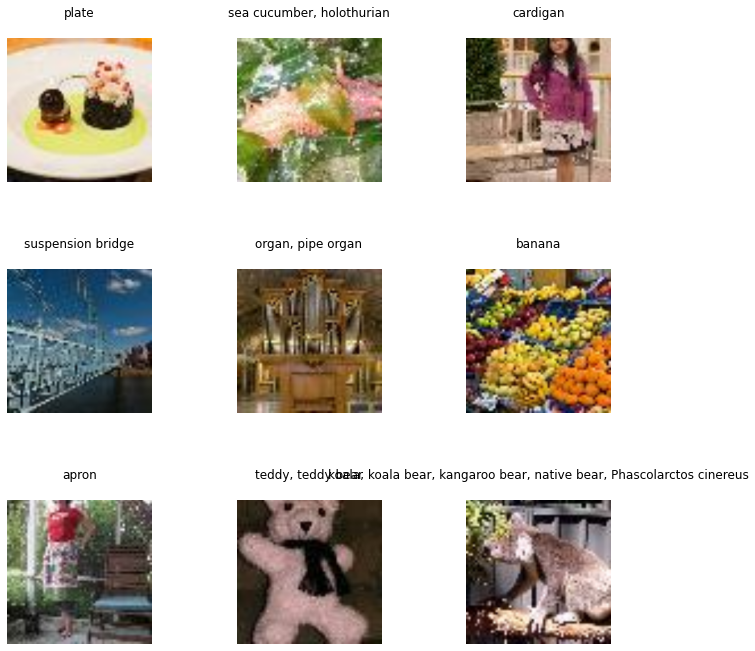

In [84]:
train_class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_words[train_class_names[int(labels[i])]])
        plt.tight_layout()
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal")
    ]
)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


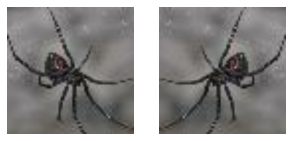

In [ ]:
plt.figure(figsize=(5, 5))
for images, _ in dataset.take(3):
    for i in range(2):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(1, 2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

## To be continued...
https://keras.io/examples/vision/image_classification_from_scratch/
https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/